# Introduction
One of the important job in risk analytics of financial services is identifying risky applicants.In this case study, apart from applying the techniques we have learnt in EDA, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to the customers. 


# Business Understanding

When a company receives a loan application from the applicant, the company has to decide whether to approve it or not based on the applicant's profile. There are two types of risk involved in it:

    -Approving loan to the applicant, who is not likely to pay, which leads to financial loss.
    -Not approving loan to the applicant, who is likely to pay, which leads to business loss.
when a person applies for a loan, the lender could take two types of decision:

## 1.Loan accepted:
If the company approves the loan, then there are three possible scenarios:

     -Fully paid - The Customer has fully paid the loan.
     -Current - The customer is in the process of paying the loan. The tenure of the loan is not yet completed.
     -Charged-off - The customer who failed to repay the loan in due time for a long period of time.
## 2.Loan rejected:
The company had rejected the loan because the client does not meet the requirement of the loan. And we do not have access to the data.


# Business objectives

-> If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

-> In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.


# Data understanding

## 1. 'loan.csv'
It contains all the information about past loan applicants and whether they paid on due time or got defaulted.

## 2. 'Data_Dictionary.xlsx'
It is a data dictionary which describes the meaning of the variables.

## Steps to Follow For Case Study
 
 - Data Understanding.
 - Data cleaning.
 - If null values present over a certain threshold value then need to remove it.
 - Univariate analysis of the data.
 - Bivariate analysis of the data.
 - If needed perform multivariate analysis.
 - Detect Aberrant & missing values.
 - Detect Outliers
 - Give reccomendations and conclusions.

# Import all the necessary libraries needed for the case study

In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime as dt

# 1.Data Understanding

## Importing Dataset from csv file


In [506]:
#Importing loan data
#As the data contains different dtypes in a same column, allowing to access more memory will avoid future errors
Loan = pd.read_csv("E:\\UPGRAD\\Stastistics Essentials\\CASE STUDY\\loan.csv", low_memory=False, index_col="id")

In [507]:
# Displaying first five rows of loan_data

Loan.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [508]:
Loan.shape

(39717, 110)

In [509]:
Loan.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [510]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


# Data Handling and Cleaning

## Fixing rows and columns

In [511]:
#Dropping all empty columns in loan
Loan.dropna(how="all", axis=1,inplace=True)
print("After dropping the empty columns, the shape of loan is",Loan.shape)

After dropping the empty columns, the shape of loan is (39717, 56)


In [512]:
#Checking for empty rows in loan
Loan.dropna(how="all", axis=0).shape

(39717, 56)

### Insights
Removing null value rows and columns because they are of no use to us. 

In [513]:
#Checking for duplicate ID in loan(index)
print("Total unique Id in Loan is", Loan.index.nunique())
print("Total rows in the Loan is",Loan.shape[0])

Total unique Id in Loan is 39717
Total rows in the Loan is 39717


From this data, it is evident that the given dataset has no duplicate rows

In [514]:
#Dropping the columns having same values
nunique = Loan.nunique()
Loan.drop(nunique[nunique==1].index , axis=1, inplace=True)
print("After dropping the columns having same values all over the row, the shape is",Loan.shape)

After dropping the columns having same values all over the row, the shape is (39717, 47)


Droping the rows and columns irrelavant to the study


In [515]:
#We can drop Member id and url column. as it is not important for the study
Loan.drop(["url","member_id"], axis=1, inplace=True)

#We can drop the rows of Loan status column with value "Current",as we do not know whether they will become default or not.
Loan = Loan[-(Loan["loan_status"].isin(["Current"]))]

In [516]:
Loan.shape

(38577, 45)

In [517]:
#Dropping information which will be available after the loan approval, thus will not be usefull to predict defaulters
Loan.drop(["out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d"], axis=1, inplace=True)
print("After dropping, the shape is",Loan.shape)

After dropping, the shape is (38577, 32)


In [518]:
#Cleaning columns name
Loan.columns = Loan.columns.str.strip().str.capitalize()
Loan.index.name = "Id"
Loan.head()

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,...,Earliest_cr_line,Inq_last_6mths,Mths_since_last_delinq,Mths_since_last_record,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,
1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.0
1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.0
1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.0
1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.0
1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,0.0


# Missing Value Treatment

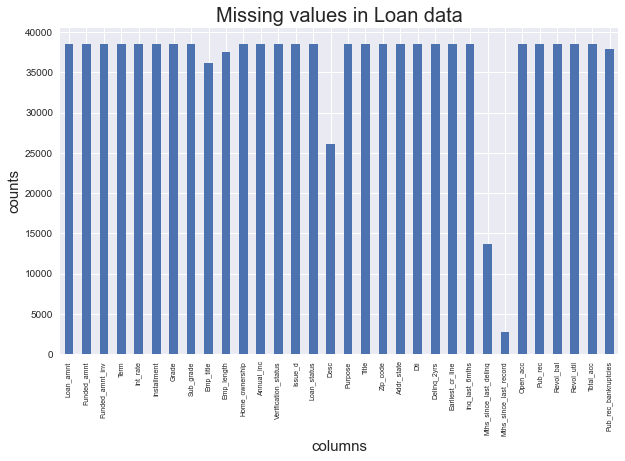

In [519]:
#Plotting missing values in loan data
plt.style.use("seaborn")
plt.figure(figsize=(10,6))
Loan.count().plot.bar()
plt.xticks(rotation=90,fontsize=7)
plt.title("Missing values in Loan data",fontsize=20)
plt.xlabel("columns", fontsize=15)
plt.ylabel("counts",fontsize=15)
plt.show()

## Insights from the plot:
        - Two columns from the dataset contains missing values more than 50%, thus we can drop the column. #### Columns with     missing values more than 50%:
        - The columns Mths_since_last_record,Mths_since_last_delinq has missing values more than 50%.

## Suggestion:
        - We can drop the columns Mths_since_last_record, Mths_since_last_delinq 

In [520]:
#Dropping the columns having missing value more than 50%
Loan.drop(["Mths_since_last_record","Mths_since_last_delinq"], axis=1, inplace=True)

In [521]:
#Cleaning Desc column:
print("Total number of missing values in Desc column is",Loan["Desc"].isnull().sum())

Total number of missing values in Desc column is 12527


## Suggestion:
We can drop the Desc column, as it contains more missing values.

In [522]:
#Dropping "Desc" column
Loan.drop("Desc", axis=1, inplace=True)

In [523]:
#Cleaning the columns Emp_title and Emp_length:
print("Missing values in Emp_title column is", Loan["Emp_title"].isnull().sum())
print("Missing values in Emp_length column is", Loan["Emp_length"].isnull().sum())

Missing values in Emp_title column is 2386
Missing values in Emp_length column is 1033


## Suggestion:
     - As the columns Emp_title and Emp_length are important variables for the study, we can drop the missing value rows.

In [524]:
#Dropping rows having nan values in "Emp_title" column
Loan = Loan[-(Loan["Emp_title"].isnull())]

#Dropping rows having nan values in "Emp_length" column
Loan = Loan[-(Loan["Emp_length"].isnull())]

In [525]:
#Cleaning the Revol_util column:
print("Missing values in Revol_util column is", Loan["Revol_util"].isnull().sum())

Missing values in Revol_util column is 46


## Suggestion:
      
      - We can fill the mode value in the place of missing values.

In [526]:
Loan["Revol_util"].value_counts().head(3)

0%       863
0.20%     59
63%       58
Name: Revol_util, dtype: int64

In [527]:
#Filling the missing values with mode value
Loan["Revol_util"].fillna(Loan["Revol_util"].mode()[0], inplace=True)

In [528]:
#Cleaning the Title column:
print("Missing values in Title column are", Loan["Title"].isnull().sum())

Missing values in Title column are 9


## Suggestion:
    - We can fill the mode value in the place of missing values.

In [529]:
Loan["Title"].value_counts().head(3)

Debt Consolidation         2000
Debt Consolidation Loan    1549
Personal Loan               614
Name: Title, dtype: int64

In [530]:
#Filling the missing value with mode value
Loan["Title"].fillna(Loan["Title"].mode()[0], inplace=True)

In [531]:
#Cleaning the Pub_rec_bankruptcies column:
print("Missing values in Pub_rec_bankruptcies column are", Loan["Pub_rec_bankruptcies"].isnull().sum())

Missing values in Pub_rec_bankruptcies column are 654


## Suggestion:
      We can fill the mode value in the place of missing values.
     

In [532]:
Loan["Pub_rec_bankruptcies"].value_counts().head(3)

0.0    34006
1.0     1471
2.0        5
Name: Pub_rec_bankruptcies, dtype: int64

In [533]:
#cleaning "Pub_rec_bankruptcies" column
Loan["Pub_rec_bankruptcies"].fillna(Loan["Pub_rec_bankruptcies"].mode()[0], inplace=True)
print("The final shape of the loan after cleaning all the rows and columns is",Loan.shape)

The final shape of the loan after cleaning all the rows and columns is (36136, 29)


In [534]:
#Checking missing values count
print("After cleaning, the number of missing values in the dataset is",Loan.isnull().sum().sum())

After cleaning, the number of missing values in the dataset is 0


In [535]:
#Cleaning "Term" column
Loan["Term"] = Loan["Term"].apply(lambda x:int(x.strip("months")))

In [536]:
#renaming "Term" column name as "Term_mnths" in order to identify the column as month
Loan.rename(columns={"Term":"Term_mnths"}, inplace=True)
Loan["Term_mnths"].dtypes

dtype('int64')

In [537]:
#Cleaning Int_rate column:
Loan["Int_rate"].value_counts().head(3)

10.99%    862
11.49%    739
7.51%     732
Name: Int_rate, dtype: int64

In [538]:
#Cleaning int_rate column
Loan["Int_rate"] = Loan["Int_rate"].apply(lambda x:float(x.strip("%")))
Loan["Int_rate"].dtypes

dtype('float64')

In [539]:
#Cleaning Emp_length column:
Loan["Emp_length"].value_counts()

10+ years    8156
2 years      4178
< 1 year     4127
3 years      3901
4 years      3266
5 years      3091
1 year       3067
6 years      2099
7 years      1663
8 years      1391
9 years      1197
Name: Emp_length, dtype: int64

In [540]:
#Assuming and replacing <1 year as 0 year and 10+ years as 10 years
Loan["Emp_length"].replace({"< 1 year":"0 year","10+ years":"10 years"},inplace=True)

#cleaning Emp_length
Loan["Emp_length"] = Loan.Emp_length.str.extract("(^\d+)").astype("float")
Loan["Emp_length"].dtypes

dtype('float64')

In [541]:
#Cleaning Revol_util column:
Loan["Revol_util"].value_counts().head(3)

0%       909
0.20%     59
63%       58
Name: Revol_util, dtype: int64

In [542]:
#cleaning revol utilization column
Loan["Revol_util"] = Loan["Revol_util"].astype(str).apply(lambda x:float(x.rstrip("%")))
Loan["Revol_util"].dtypes

dtype('float64')

In [543]:
#Cleaning Revol_util column:
Loan["Issue_d"] = pd.to_datetime(Loan["Issue_d"], format ="%b-%y")
Loan["Earliest_cr_line"] = pd.to_datetime(Loan["Earliest_cr_line"], format ="%b-%y")

In [544]:
Loan["Earliest_cr_line"].sort_values()


Id
107136    1969-02-01
454092    1969-02-01
1057384   1969-03-01
781693    1969-03-01
474431    1969-03-01
             ...    
990789    2068-08-01
1042802   2068-09-01
879876    2068-09-01
383364    2068-10-01
647976    2068-12-01
Name: Earliest_cr_line, Length: 36136, dtype: datetime64[ns]

The "Earliest_cr_line" contains years less than 1968. python datetime library interprets year less than 1968 for next century like 2068, thus we need to correct that.

In [545]:
#writing function to correct the datetime
#As the earliest credit lines start from year 1946 to 2008, if year is more than 2008 we need to reduce one century
def fix_date(x):
    if x.year >= 2009:
        year = x.year - 100
    else:
        year = x.year
    return dt.date(year,x.month,x.day)

In [546]:
#cleaning "Earliest_cr_line" column
Loan["Earliest_cr_line"] = Loan["Earliest_cr_line"].apply(fix_date).astype("datetime64")

In [547]:
Loan["Earliest_cr_line"].sort_values()

Id
771203    1946-01-01
751959    1950-12-01
634940    1954-11-01
772702    1956-09-01
816677    1962-09-01
             ...    
1039102   2008-09-01
989257    2008-09-01
982285    2008-09-01
1028850   2008-10-01
1063003   2008-11-01
Name: Earliest_cr_line, Length: 36136, dtype: datetime64[ns]

In [548]:
#checking the data types of all the columns
Loan.dtypes

Loan_amnt                        int64
Funded_amnt                      int64
Funded_amnt_inv                float64
Term_mnths                       int64
Int_rate                       float64
Installment                    float64
Grade                           object
Sub_grade                       object
Emp_title                       object
Emp_length                     float64
Home_ownership                  object
Annual_inc                     float64
Verification_status             object
Issue_d                 datetime64[ns]
Loan_status                     object
Purpose                         object
Title                           object
Zip_code                        object
Addr_state                      object
Dti                            float64
Delinq_2yrs                      int64
Earliest_cr_line        datetime64[ns]
Inq_last_6mths                   int64
Open_acc                         int64
Pub_rec                          int64
Revol_bal                

## Assumption:
As already 1 year category present in the "Emp_length" column, lets assume,

               - <1 year as 0 year
               - 10+ years as 10 years. 

# Sanity checks

The Funded amount should not be more than Loan amount

In [549]:
#Dropping the row if loan amount is less than funded amount
Loan[Loan["Loan_amnt"] < Loan["Funded_amnt"]]

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,...,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,


 - All the funded amount are less than the loan amount.

The Funded amount by investors should not be more than funded amount.

In [550]:
#Dropping the row if funded amount is less than the funded amount by investors
Loan[Loan["Funded_amnt"] < Loan["Funded_amnt_inv"]]

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,...,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,


- All the funded amount by investors are less than funded amount approved by Lending club.


In [551]:
#The customer applying for the loan for the purpose of debt consolidation should not have dept-to-income ratio as zero
Loan[(Loan["Purpose"].str.contains("debt_consolidation")) & (Loan["Dti"]==0)].head()

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,...,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,
1008627,6500,6500,6500.0,36,10.65,211.73,B,B2,Donovan Hatem LLP,2.0,...,0.0,0,1998-10-01,2,2,0,0,0.0,7,0.0
1001046,5150,5150,5150.0,36,7.90,161.15,A,A4,Walmart Information Systems Division,7.0,...,0.0,0,1997-09-01,2,6,0,0,0.0,10,0.0
840315,14500,14500,14500.0,36,7.49,450.98,A,A4,DVAMC Beckley,10.0,...,0.0,0,1991-03-01,1,7,0,0,0.0,18,0.0
821257,15000,15000,14975.0,36,9.99,483.94,B,B1,Sony Music,4.0,...,0.0,0,1991-07-01,1,6,0,0,0.0,16,0.0
816954,6400,6400,6400.0,36,9.99,206.48,B,B1,Oracle Corporation,3.0,...,0.0,0,2006-02-01,1,5,0,0,0.0,10,0.0


In [552]:
#Dropping the row having zero dti but applying loan for dept consolidation
Loan = Loan[-((Loan["Purpose"].str.contains("debt_consolidation")) & (Loan["Dti"]==0))]

In [553]:
#The number of open accounts in borrower's credit file should not be greater than total accounts in his credit file
Loan[Loan["Open_acc"] > Loan["Total_acc"]]

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Grade,Sub_grade,Emp_title,Emp_length,...,Dti,Delinq_2yrs,Earliest_cr_line,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,,,,,
127213,2000,2000,1575.0,36,7.12,61.87,A,A1,U.S. Government,10.0,...,0.43,0,1991-06-01,0,14,0,4709,18.5,8,0.0


 - In this row, total number of open credit lines in borrower's credit file is more than the total credit lines in borrower's current credit file. This row is suspicious thus we can drop it.

In [554]:
#Dropping the rows having open credit lines in credit file is more than total credit lines in credit file
Loan = Loan[-(Loan["Open_acc"] > Loan["Total_acc"])]
print("The shape of the dataset after doing sanity checks is",Loan.shape)

The shape of the dataset after doing sanity checks is (36110, 29)


# Categorical data cleaning

In [555]:
#Extracting categorical variables from dataset and naming as "Cat_Loan"
Cat_Loan = Loan.select_dtypes(exclude=[np.number])

#Extracting numeric variables from dataset and naming as "Con_Loan"
Con_Loan = Loan.select_dtypes(include=[np.number])

# Derived column:

  - Cat_Loan = Categorical columns of loan data
  - Con_Loan = Contiunous columns of loan data

In [556]:
Cat_Loan.head()

,Grade,Sub_grade,Emp_title,Home_ownership,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Earliest_cr_line
Id,,,,,,,,,,,,
1077430,C,C4,Ryder,RENT,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1999-04-01
1076863,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,1996-02-01
1075269,A,A4,Veolia Transportaton,RENT,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,2004-11-01
1069639,C,C5,Southern Star Photography,RENT,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,2005-07-01
1072053,E,E1,MKC Accounting,RENT,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900xx,CA,2007-01-01


# Cleaning Emp_title column:

In [557]:
print("The unique count of Emp title column is", Loan["Emp_title"].nunique())
Loan["Emp_title"].value_counts().head(10)

The unique count of Emp title column is 27964


US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Wells Fargo           52
UPS                   52
USAF                  51
US Air Force          51
Walmart               45
Name: Emp_title, dtype: int64

 - The employment title have more number of duplicates, thus we need to treat the values.

In [558]:
#replacing the symbols in the Emp title column
Loan["Emp_title"] = Loan["Emp_title"].apply(lambda x:x.strip().replace(",","").replace(".","").replace("&","and").replace("-"," ").replace("'","").replace(" ","").lower())
#replacing dublicate values
Loan["Emp_title"].replace({"unitedstatesairforce":"usairforce","unitedstatesarmy":"usarmy","self":"selfemployed","unitedstatespostalservice":"uspostalservice","usaf":"usairforce","unitedstatesnavy":"usnavy"}, inplace =True)
print("After cleaning, the unique count of Employment title column becomes",Loan["Emp_title"].nunique())
Loan["Emp_title"].value_counts().head(10)

After cleaning, the unique count of Employment title column becomes 25623


usarmy             296
usairforce         174
selfemployed       154
bankofamerica      134
walmart            112
uspostalservice    110
jpmorganchase       90
atandt              88
usnavy              81
wellsfargo          71
Name: Emp_title, dtype: int64

 - Removed spaces,commas,etc and uncapitalized the Employment title column, thus merged 2341 duplicates in employment title column.


# Cleaning title column:

In [559]:
print("the unique values of the title column is",Loan["Title"].nunique())
Loan["Title"].value_counts().head(10)

the unique values of the title column is 18088


Debt Consolidation           2007
Debt Consolidation Loan      1547
Personal Loan                 614
Consolidation                 475
debt consolidation            446
Credit Card Consolidation     332
Home Improvement              327
Debt consolidation            307
Personal                      283
Credit Card Loan              280
Name: Title, dtype: int64

 - The title have more number of duplicates, thus we need to deduplicate the values.

In [560]:
Loan["Title"] = Loan["Title"].apply(lambda x:x.lower().replace("_"," ").strip())

#converting all credit card reasons in title column as credit card
Loan.loc[Loan["Title"].str.contains("credit card"), "Title"] = "credit card"
#converting all education reasons in title column as education
Loan.loc[Loan["Title"].str.contains("education"), "Title"] = "education"
#converting all personal loan reasons in title column as personal
Loan.loc[Loan["Title"].str.contains("personal"), "Title"] = "personal"
#converting all home reasons in title column as home
Loan.loc[Loan["Title"].str.contains("home"), "Title"] = "home"

#removing loan from the end
Loan["Title"] = Loan["Title"].apply(lambda x:x.replace("loan","").replace("dept","debt").strip())
#converting all dept reasons in title column as dept consolidation
Loan.loc[Loan["Title"].str.contains("debt"), "Title"] = "debt consolidation"
Loan["Title"].value_counts().head(50)

#some rows with having value only "loan" is replaced with space,while cleaning the title column thus replacing with mode values.
Loan["Title"] = Loan["Title"].apply(lambda x:"dept consolidation" if x=="" else x)
print("After almost cleaning, the unique count becomes ",Loan["Title"].nunique())
Loan["Title"].value_counts().head(10)

After almost cleaning, the unique count becomes  11171


debt consolidation    8341
credit card           3765
personal              1907
home                  1734
consolidation         1086
wedding                419
small business         316
car                    301
dept consolidation     291
other                  227
Name: Title, dtype: int64

 - Removing duplicate from the title column, thus merged 6917 duplicates in title column.

# Outliers analysis

In [561]:
#Viewing statistical data of all the columns
Loan.describe()

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Emp_length,Annual_inc,Dti,Delinq_2yrs,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
count,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,3.611000e+04,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000,36110.000000
mean,11105.825256,10842.130989,10270.287862,41.987704,11.968871,323.875380,4.962947,6.904553e+04,13.363387,0.147438,0.870673,9.327665,0.053808,13358.693104,48.999714,22.140155,0.040958
std,7313.944612,7060.203282,6993.577109,10.385340,3.685172,207.270132,3.540535,6.463412e+04,6.639594,0.495040,1.067990,4.393944,0.235020,15723.939949,28.273661,11.410931,0.198894
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.010000,167.710000,2.000000,4.100000e+04,8.270000,0.000000,0.000000,6.000000,0.000000,3747.250000,25.700000,14.000000,0.000000
50%,10000.000000,9600.000000,8875.000000,36.000000,11.830000,280.375000,4.000000,6.000000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8903.000000,49.500000,20.000000,0.000000
75%,15000.000000,15000.000000,14011.462378,36.000000,14.420000,426.470000,9.000000,8.200600e+04,18.610000,0.000000,1.000000,12.000000,0.000000,17043.000000,72.500000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000


# Detail inferred from the statistical data
      - If the difference between mean and median is so large(without having more number of zero values in the column), then it is evident that the column has outliers.
      - From the above details, the "Annual_inc" column contains outliers.
     

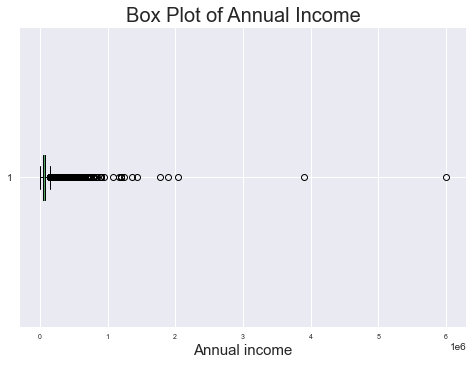

In [562]:
#Checking Annual_inc column:
#Plotting boxplot to view the spread of the data
plt.boxplot(Loan["Annual_inc"], vert=False)
plt.xticks(rotation=0,fontsize=7)
plt.title("Box Plot of Annual Income",fontsize=20)
plt.xlabel("Annual income",fontsize=15)
plt.show()

From the box plot it is clearly evident that the annual income column has outliers. These outliers will leads to a biased inference.

## Suggestion:
   - We can drop the rows with annual income more than 06 lakh.

In [563]:
#Dropping rows with annual income more than 06 lakh
Loan = Loan[-(Loan["Annual_inc"]>600000)]
print("The shape of the loan data is",Loan.shape)

The shape of the loan data is (36065, 29)


In [564]:
#categorical dataset
Cat_Loan.head()

,Grade,Sub_grade,Emp_title,Home_ownership,Verification_status,Issue_d,Loan_status,Purpose,Title,Zip_code,Addr_state,Earliest_cr_line
Id,,,,,,,,,,,,
1077430,C,C4,Ryder,RENT,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1999-04-01
1076863,C,C1,AIR RESOURCES BOARD,RENT,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,1996-02-01
1075269,A,A4,Veolia Transportaton,RENT,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,2004-11-01
1069639,C,C5,Southern Star Photography,RENT,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,280xx,NC,2005-07-01
1072053,E,E1,MKC Accounting,RENT,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,900xx,CA,2007-01-01


In [565]:
#numercial dataset
Con_Loan.head()

,Loan_amnt,Funded_amnt,Funded_amnt_inv,Term_mnths,Int_rate,Installment,Emp_length,Annual_inc,Dti,Delinq_2yrs,Inq_last_6mths,Open_acc,Pub_rec,Revol_bal,Revol_util,Total_acc,Pub_rec_bankruptcies
Id,,,,,,,,,,,,,,,,,
1077430,2500,2500,2500.0,60,15.27,59.83,0.0,30000.0,1.00,0,5,3,0,1687,9.4,4,0.0
1076863,10000,10000,10000.0,36,13.49,339.31,10.0,49200.0,20.00,0,1,10,0,5598,21.0,37,0.0
1075269,5000,5000,5000.0,36,7.90,156.46,3.0,36000.0,11.20,0,3,9,0,7963,28.3,12,0.0
1069639,7000,7000,7000.0,60,15.96,170.08,8.0,47004.0,23.51,0,1,7,0,17726,85.6,11,0.0
1072053,3000,3000,3000.0,36,18.64,109.43,9.0,48000.0,5.35,0,2,4,0,8221,87.5,4,0.0


# Univariate analysis

Our given problem statement is to find the risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss.

To start with we can analysis loan status first so that we can get to know howm many have completed and charged off.

# 1. Analyzing Loan status column:

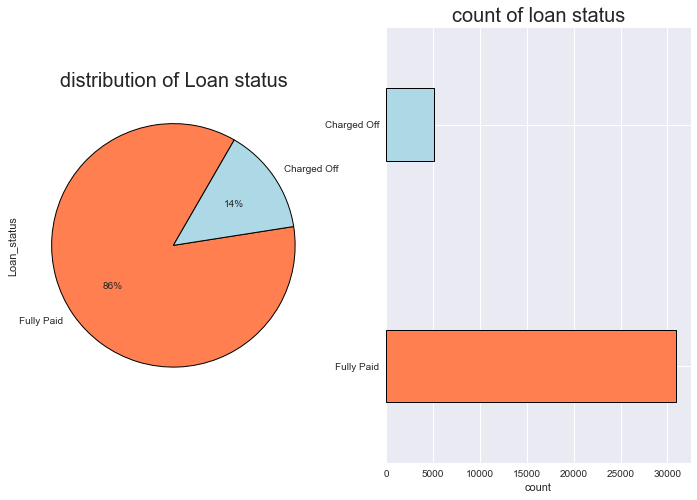

In [566]:
plt.figure(figsize=[12,8])
#plotting a pie chart for Loan status column
plt.subplot(1,2,1)
Loan["Loan_status"].value_counts().plot.pie(autopct="%1.0f%%", startangle=60, colors=["coral","lightblue"],wedgeprops={"linewidth":1, "edgecolor":"k"})
plt.title("distribution of Loan status", fontsize=20)

#plotting a horizontal bar chart for Loan status column
plt.subplot(1,2,2)
Loan["Loan_status"].value_counts().plot.barh(width=0.3, color=["coral","lightblue"],linewidth=1, edgecolor="k")
plt.title("count of loan status", fontsize=20)
plt.xlabel("count")
plt.show()

## Insights from the graph:
    - Approximately 14% of total clients are facing difficulties in repaying the loan.

# 2. Analyzing Purpose Column: 

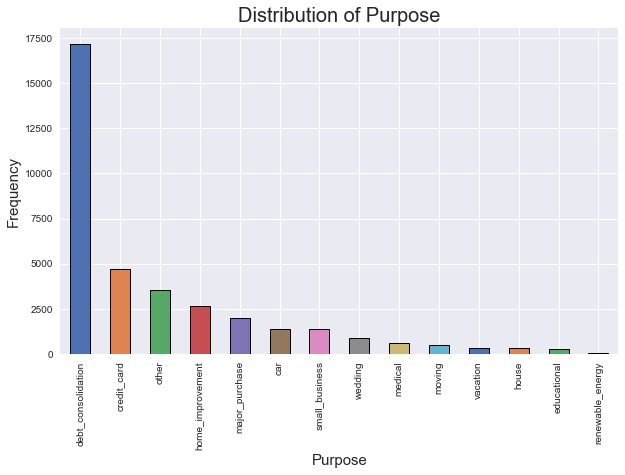

In [567]:
#plotting distribution of purpose of loan 
plt.figure(figsize=[10,6])
Loan["Purpose"].value_counts().head(15).plot.bar(color=sns.color_palette("deep"),linewidth=1,edgecolor="k")
plt.title("Distribution of Purpose", fontsize=20)
plt.xlabel("Purpose",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

## Insights:
     - Most of the customers are applying for loan for dept consolidation followed by credit card payments. 

# 3. Analyzing Grades Column:

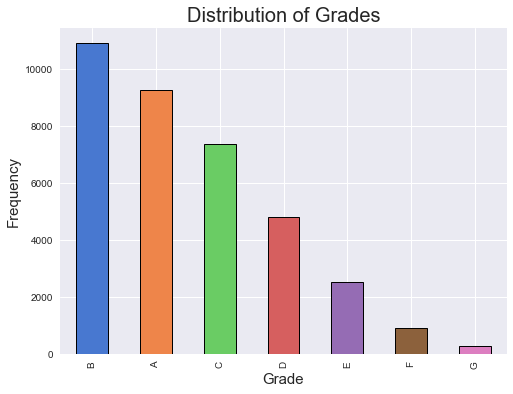

In [568]:
#plotting a horizontal bar chart for Grade column
plt.figure(figsize=[8,6])
Loan["Grade"].value_counts().plot.bar(width=0.5, color=sns.color_palette("muted",7),linewidth=1, edgecolor="k")
plt.title("Distribution of Grades", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Grade",fontsize=15)
plt.show()

## Insights:
     - Maximum number of approval was for grade B applicants wheareas minimum approval was for grade G applicants.

# Bivariate analysis

In [569]:
#Transforming loan status into binary variable (charged off = 1, fully paid=0) for analysis
Loan["Loan_status_bin"] = Loan["Loan_status"].apply(lambda x:1 if x=="Charged Off" else 0)

## Derived column:
   - Loan_status_bin: The column created by converting the loan status column into binary digits(charged off=1, fully paid=0)

In [570]:
#creating a new column by bucketing the funded amounts into 07 buckets
Loan["Funded_amnt_bucket"] = pd.qcut(Loan["Funded_amnt"], q=7, labels=["0-5k","5-10k","10-15k","15-20k","20-25k","25-30k","30-35k"])

# 1. Loan status vs Funded amount:

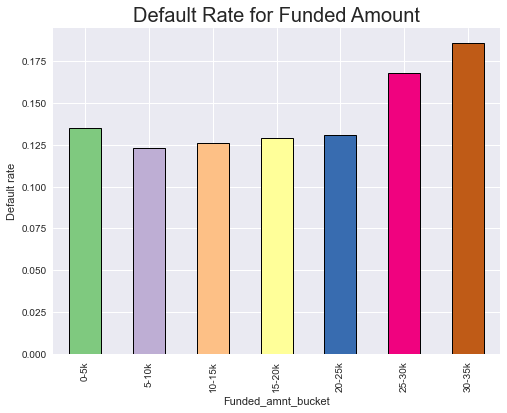

In [571]:
#plotting default rate with respect to Funded amount
plt.figure(figsize=[8,6])
Loan.groupby(by="Funded_amnt_bucket")["Loan_status_bin"].mean().plot.bar(color=sns.color_palette("Accent"), linewidth=1,edgecolor="k")
plt.title("Default Rate for Funded Amount", fontsize=20)
plt.ylabel("Default rate")
plt.show()

## Insights
      - The default rate is more for the category 30 to 35k of around 19% (approx 0.19 in graph), followed by the next below category 25 to 30k of around 17%.
      - Higher the funded amount greater the change to get default.

# 2. Loan status vs Grade:

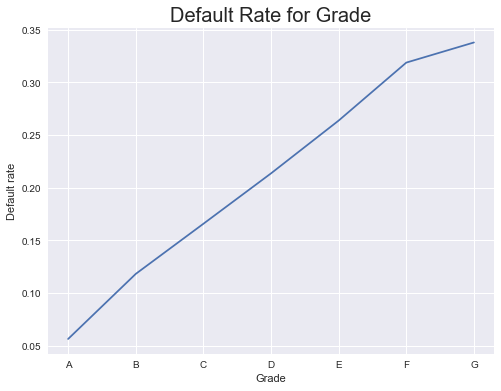

In [572]:
#plotting default rate with respect to grades  
plt.figure(figsize=[8,6])
Loan.groupby(by="Grade")["Loan_status_bin"].mean().plot.line()
plt.title("Default Rate for Grade", fontsize=20)
plt.ylabel("Default rate")
plt.show()

## Insights:
  - As the line is linear with positive slope, the grade is positively correlated with default rate.

# 3. Loan status vs Purpose:

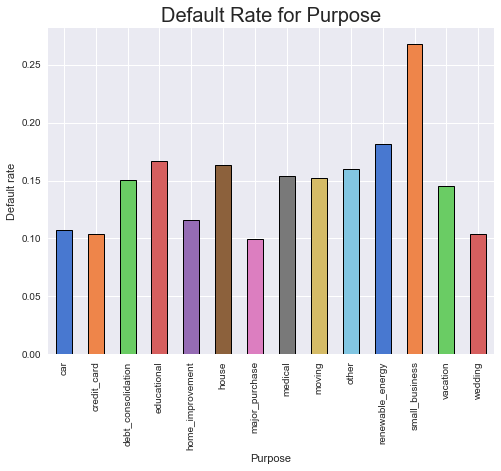

In [573]:
#Plotting default rate with respect to purpose
plt.figure(figsize=[8,6])
Loan.groupby(by="Purpose")["Loan_status_bin"].mean().plot.bar(color=sns.color_palette("muted"),linewidth=1,edgecolor="k")
plt.title("Default Rate for Purpose", fontsize=20)
plt.ylabel("Default rate")
plt.show()

## Point to infer from the graph:
     - The customers who is applying loan for small business are more likely to default wit default rate of around 26%.


# 4. Loan status vs Home ownership:


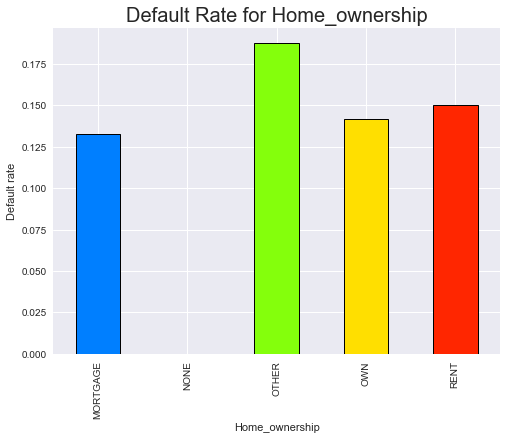

In [574]:
#plotting default rate with respect to Home ownership
plt.figure(figsize=[8,6])
Loan.groupby(by="Home_ownership")["Loan_status_bin"].mean().plot.bar(color=sns.color_palette("gist_ncar"),linewidth=1,edgecolor="k")
plt.title("Default Rate for Home_ownership", fontsize=20)
plt.ylabel("Default rate")
plt.show()

## Insights:
   - The customers who are living in rent are more likely to default with default rate of around 15%.


# 5. Loan status vs Interest rate:

In [575]:
#Creating a new column by bucketing the interest rate column
Loan["Int_rate_bucket"] = pd.qcut(Loan["Int_rate"], q=5, labels=["VL","L","M","H","VH"])

Text(0, 0.5, 'Interest rate')

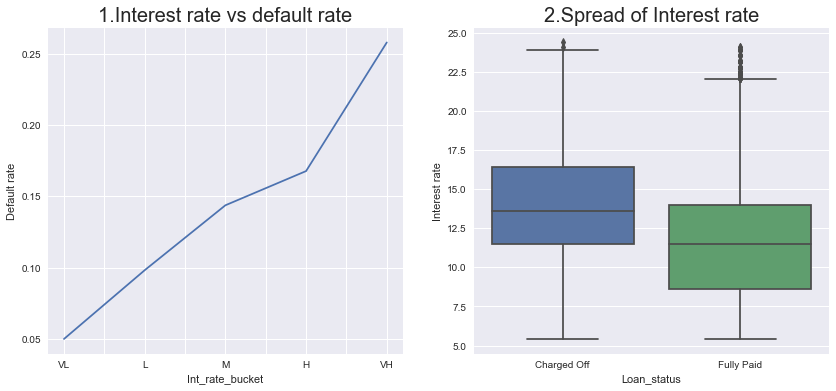

In [576]:
#plotting default rate with respect to interest rate:
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
Loan.groupby(by="Int_rate_bucket")["Loan_status_bin"].mean().plot.line()
plt.title("1.Interest rate vs default rate", fontsize=20)
plt.ylabel("Default rate")

#plotting spread of interest rate for defaulters and fully paid
plt.subplot(1,2,2)
sns.boxplot(x=Loan["Loan_status"], y=Loan["Int_rate"])
plt.title("2.Spread of Interest rate", fontsize=20)
plt.ylabel("Interest rate")

## Insights:
  - From plot 1 it is evident that the interest rate and default rate are positively correlated. when interest rate increases the customer is more likely to default.
  - From plot 2 we can see that 75% of fully paid peoples are with interest rate less than approximately 14%. and 50% of charged off peoples are above 13% interest rate.

# 6. Loan status vs Employment length:

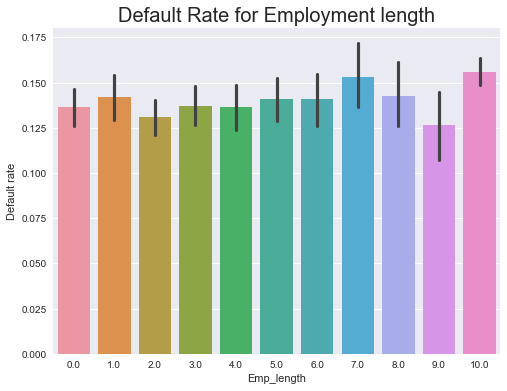

In [577]:
#Plotting default rate with respect to Employment length    
plt.figure(figsize=[8,6])
sns.barplot(data=Loan, x="Emp_length", y="Loan_status_bin")
plt.title("Default Rate for Employment length", fontsize=20)
plt.ylabel("Default rate")
plt.show()

## Insights:
   - From the plot it is evident that those who having more than 10 years of work experience will more likely to default with default rate of 15%.


# 7. Plotting pair plots for continuous variables

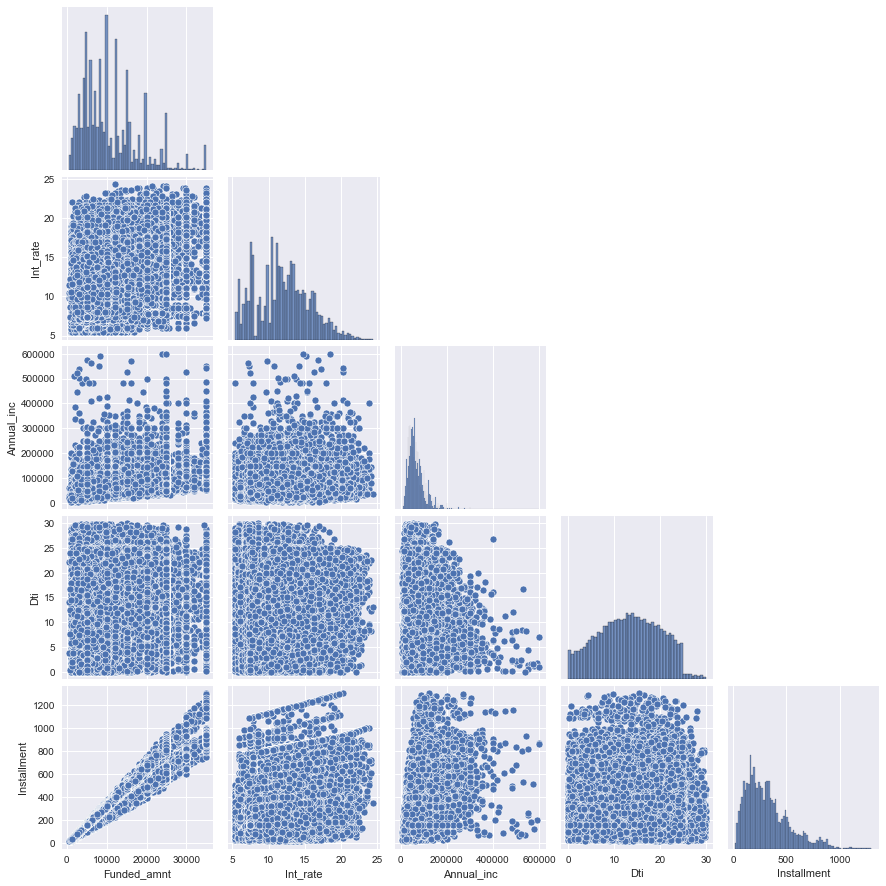

In [578]:
#Plotting pair plots for Funded amnt, interest rate, annual income, dept to income ratio, and installment columns.
sns.pairplot(Loan[["Funded_amnt","Int_rate","Annual_inc","Dti","Installment"]], corner=True)
plt.show()

## Insights:
    - The installment amount increase with increase in funded amount
    - The dept to income ratio is normally distributed.
    - The dept to income ratio decrease if annual income increase
    - Majority of the customers are with annual income less than 04 lakhs